In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score

In [2]:
original_df=pd.read_csv(r"C:\Users\Naga Nandi Reddy\OneDrive\Desktop\data.csv")
df=original_df.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [6]:
df.describe(include="all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.duplicated().sum()
#df[df.duplicated()]
#df.drop_duplicates(keep='first',inplace=True)

0

In [10]:
def check_duplications(dataframe):
    if dataframe.duplicated().sum() > 0:
        if dataframe.duplicated().sum() == 1:
            print('There is {} duplicated value in data'.format(dataframe.duplicated().sum()))
        else:
            print('There are {} duplicated values in data'.format(dataframe.duplicated().sum()))
    else:
        print('There are no duplicated values in data')

check_duplications(df)

There are no duplicated values in data


In [11]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols= [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O' and
                   dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == 'O' and
                   dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat ]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 569
Variables: 32
cat_cols: 1
num_cols: 31
cat_but_car: 0
num_but_cat: 0


In [13]:
cat_cols

['diagnosis']

In [14]:
num_cols = [col for col in num_cols if col!='id']

In [15]:
def cat_summary(dataframe, col_name, plot=False):
    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("#######")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("########")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)

           diagnosis      Ratio
diagnosis                      
B                357  62.741652
M                212  37.258348
########


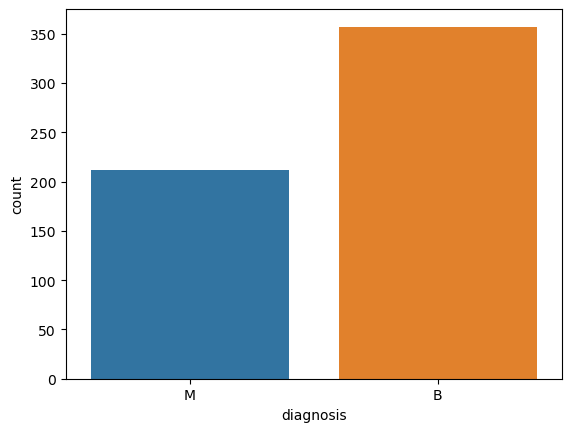

In [16]:
for col in cat_cols:
    cat_summary(df,col,plot=True)

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
50%       13.370000
60%       14.058000
70%       15.056000
80%       17.068000
90%       19.530000
95%       20.576000
99%       24.371600
max       28.110000
Name: radius_mean, dtype: float64


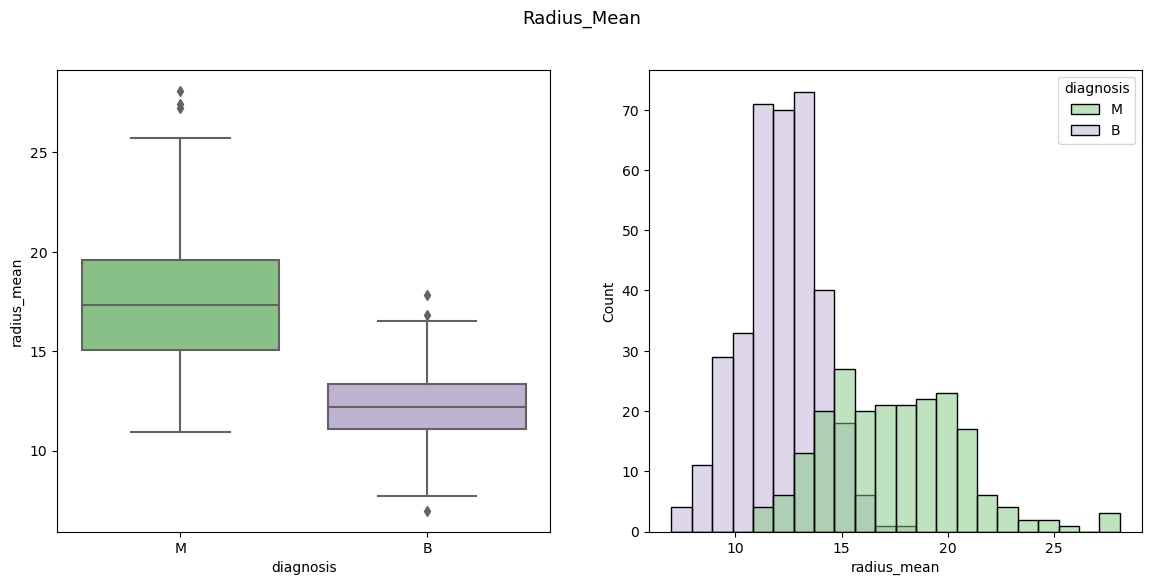

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
50%       18.840000
60%       19.968000
70%       21.272000
80%       22.440000
90%       24.992000
95%       27.150000
99%       30.652000
max       39.280000
Name: texture_mean, dtype: float64


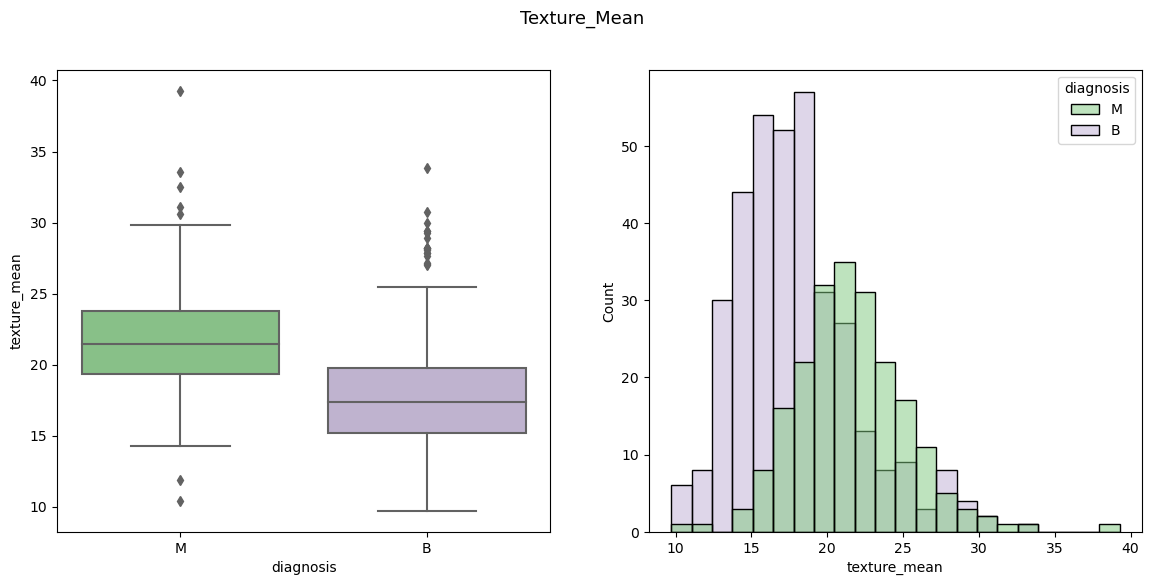

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
50%       86.240000
60%       91.420000
70%       98.200000
80%      111.680000
90%      129.100000
95%      135.820000
99%      165.724000
max      188.500000
Name: perimeter_mean, dtype: float64


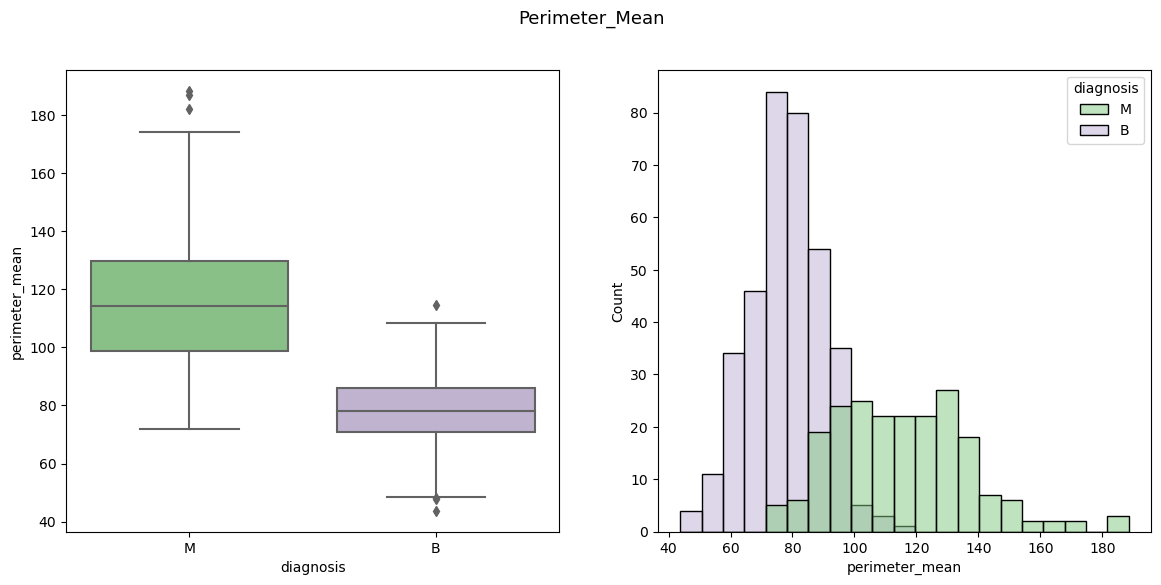

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
50%       551.100000
60%       609.740000
70%       700.660000
80%       915.060000
90%      1177.400000
95%      1309.800000
99%      1786.600000
max      2501.000000
Name: area_mean, dtype: float64


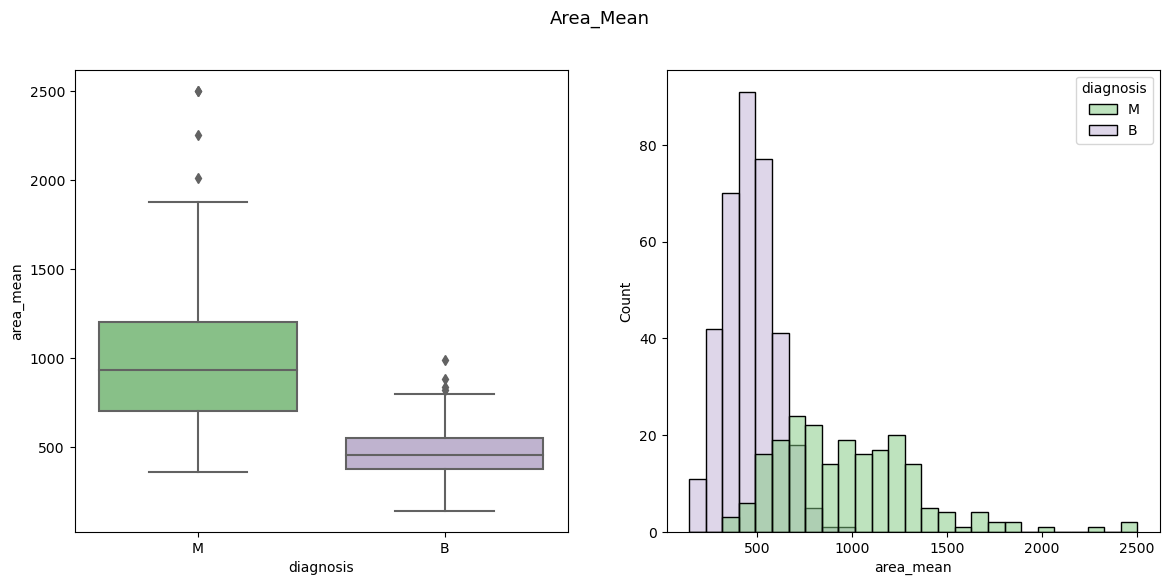

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
50%        0.095870
60%        0.099338
70%        0.103260
80%        0.107500
90%        0.114820
95%        0.118780
99%        0.132888
max        0.163400
Name: smoothness_mean, dtype: float64


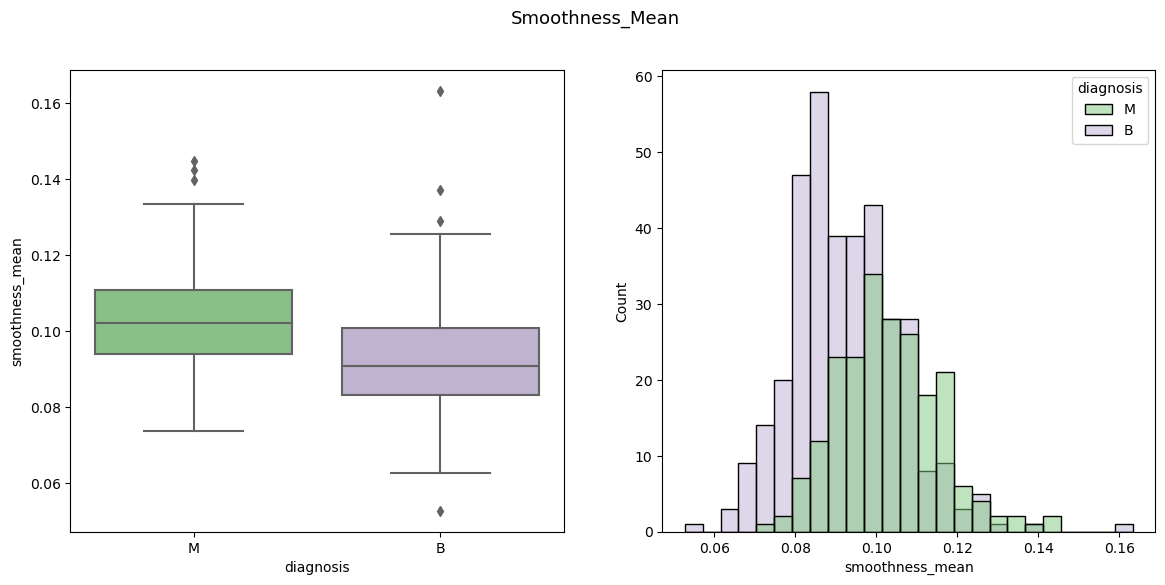

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
50%        0.092630
60%        0.108740
70%        0.122420
80%        0.141900
90%        0.175460
95%        0.208700
99%        0.277192
max        0.345400
Name: compactness_mean, dtype: float64


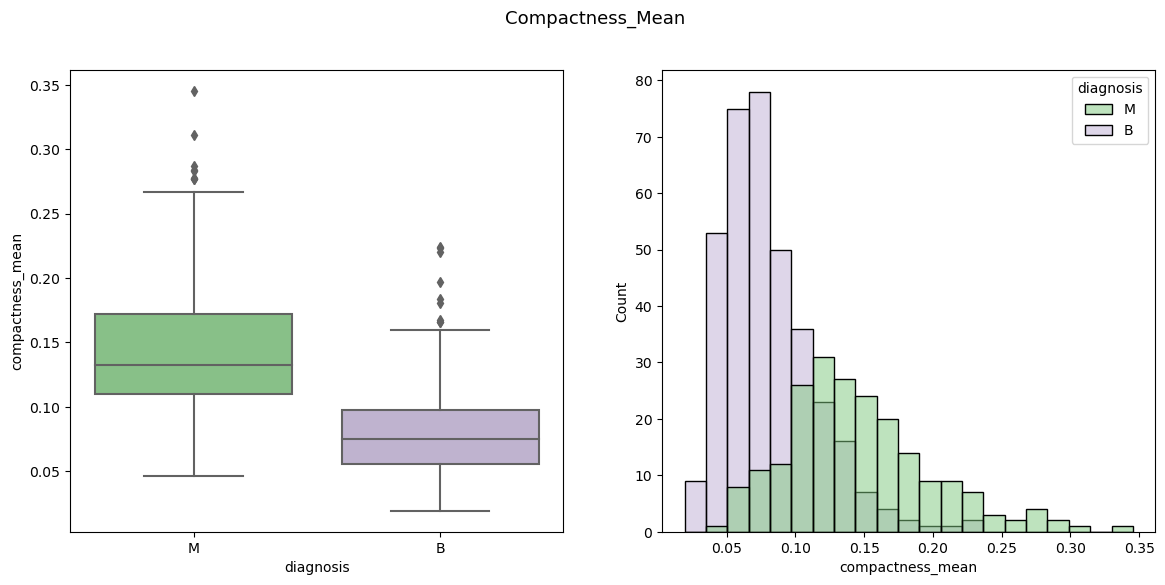

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
50%        0.061540
60%        0.086212
70%        0.111920
80%        0.149780
90%        0.203040
95%        0.243020
99%        0.351688
max        0.426800
Name: concavity_mean, dtype: float64


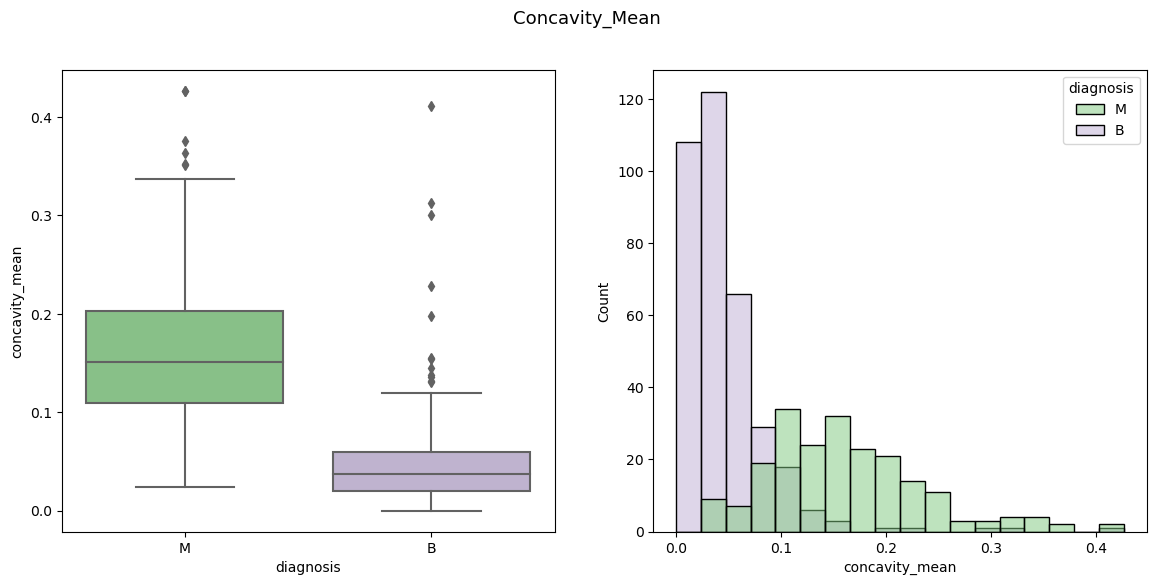

count    569.000000
mean       0.048919
std        0.038803
min        0.000000
50%        0.033500
60%        0.048318
70%        0.064496
80%        0.084254
90%        0.100420
95%        0.125740
99%        0.164208
max        0.201200
Name: concave points_mean, dtype: float64


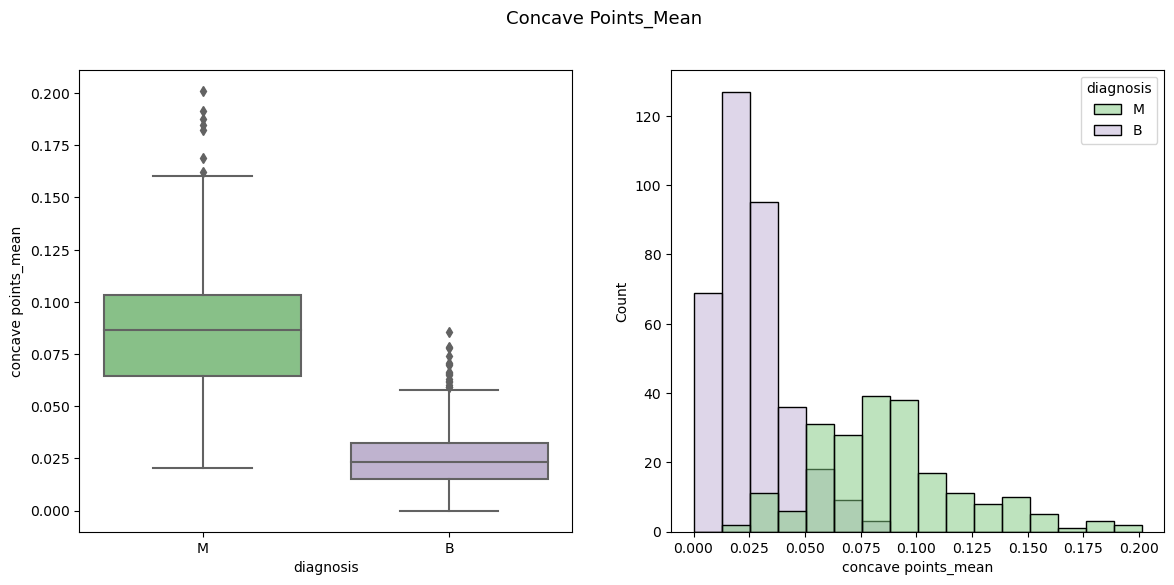

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
50%        0.179200
60%        0.185480
70%        0.192800
80%        0.200540
90%        0.214940
95%        0.230720
99%        0.259564
max        0.304000
Name: symmetry_mean, dtype: float64


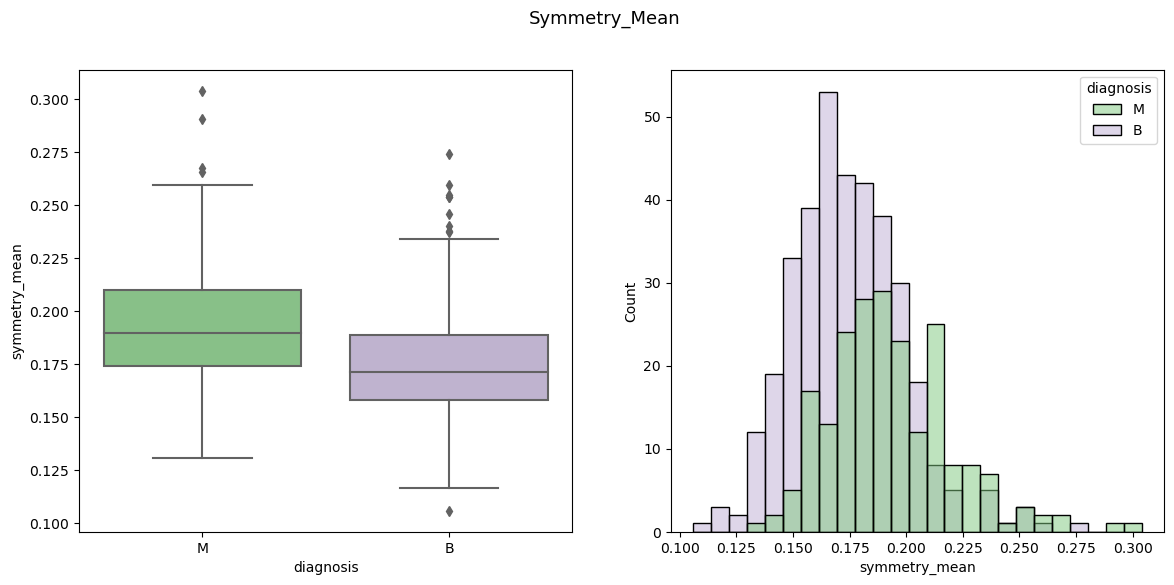

count    569.000000
mean       0.062798
std        0.007060
min        0.049960
50%        0.061540
60%        0.063148
70%        0.065048
80%        0.067630
90%        0.072266
95%        0.076090
99%        0.085438
max        0.097440
Name: fractal_dimension_mean, dtype: float64


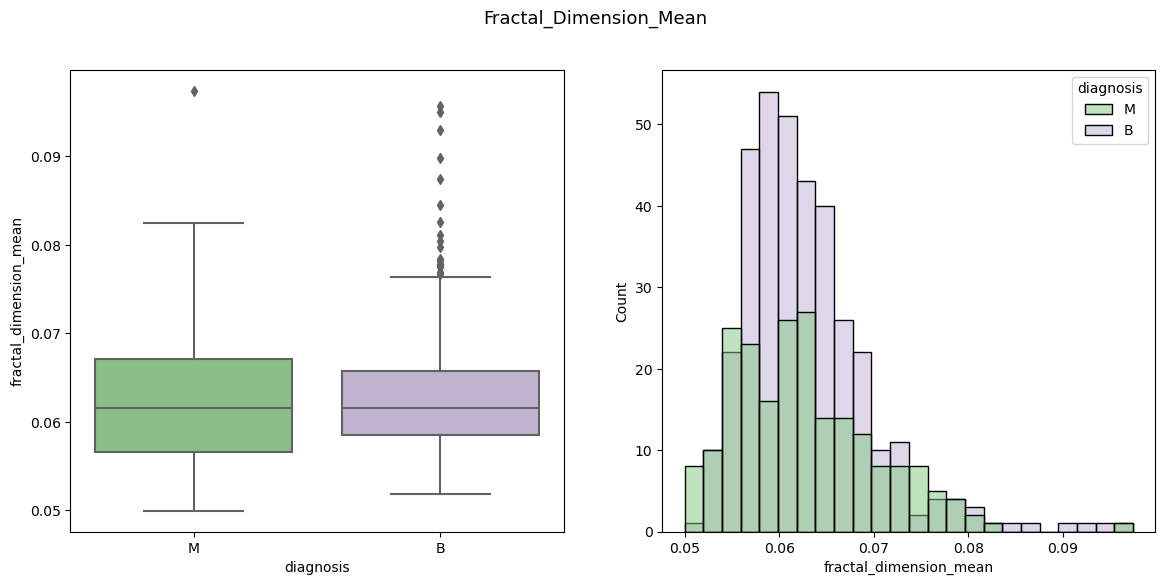

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
50%        0.324200
60%        0.369460
70%        0.431020
80%        0.546140
90%        0.748880
95%        0.959520
99%        1.291320
max        2.873000
Name: radius_se, dtype: float64


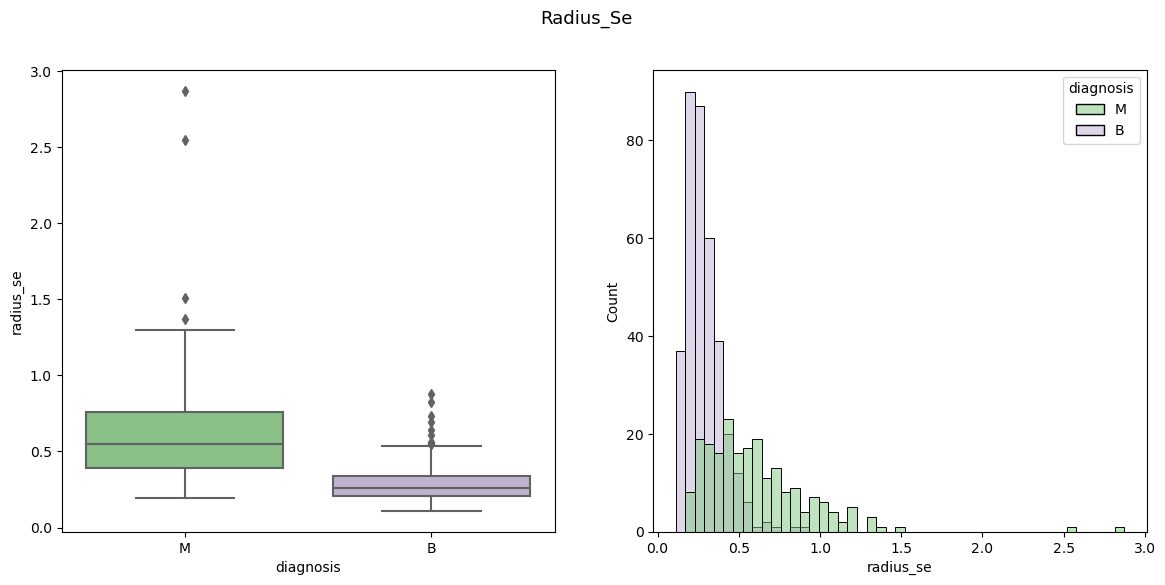

count    569.000000
mean       1.216853
std        0.551648
min        0.360200
50%        1.108000
60%        1.238800
70%        1.388200
80%        1.561200
90%        1.909400
95%        2.212000
99%        2.915440
max        4.885000
Name: texture_se, dtype: float64


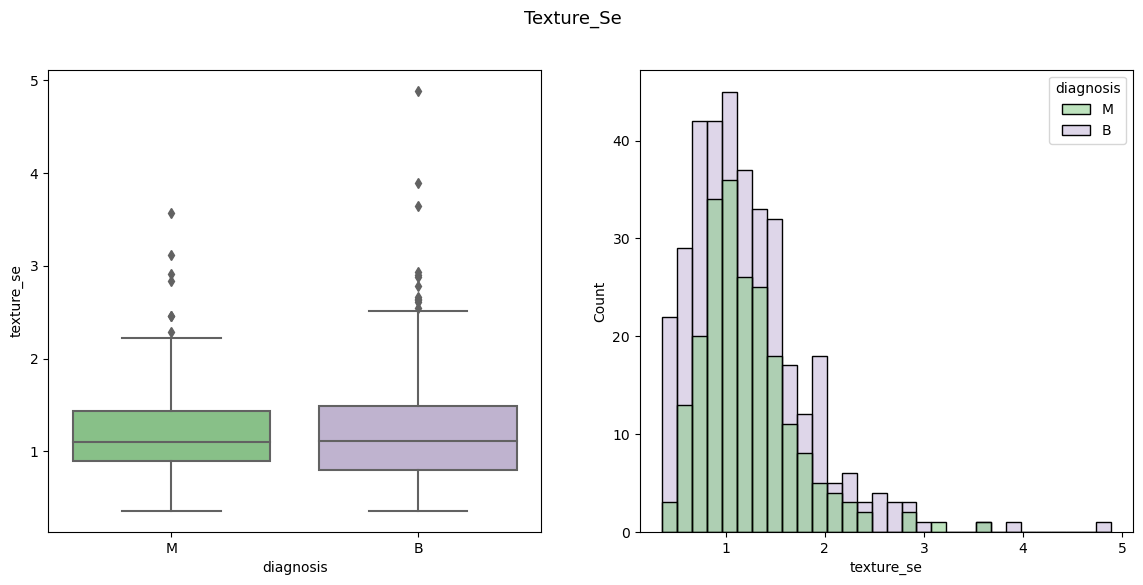

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
50%        2.287000
60%        2.590800
70%        3.050200
80%        3.767800
90%        5.123200
95%        7.041600
99%        9.690040
max       21.980000
Name: perimeter_se, dtype: float64


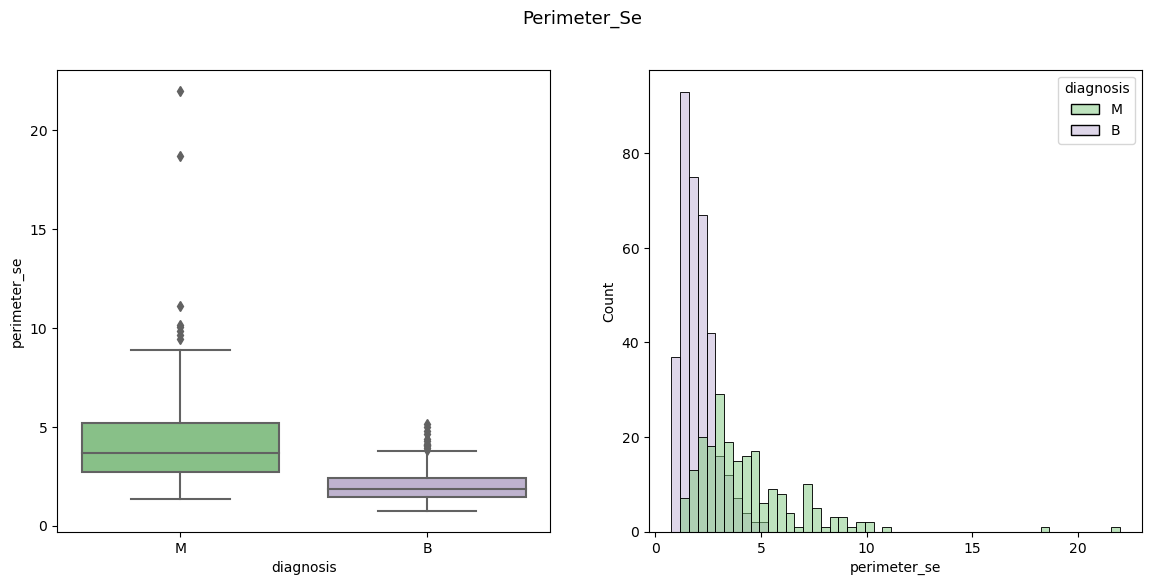

count    569.000000
mean      40.337079
std       45.491006
min        6.802000
50%       24.530000
60%       29.322000
70%       38.430000
80%       54.088000
90%       91.314000
95%      115.800000
99%      177.684000
max      542.200000
Name: area_se, dtype: float64


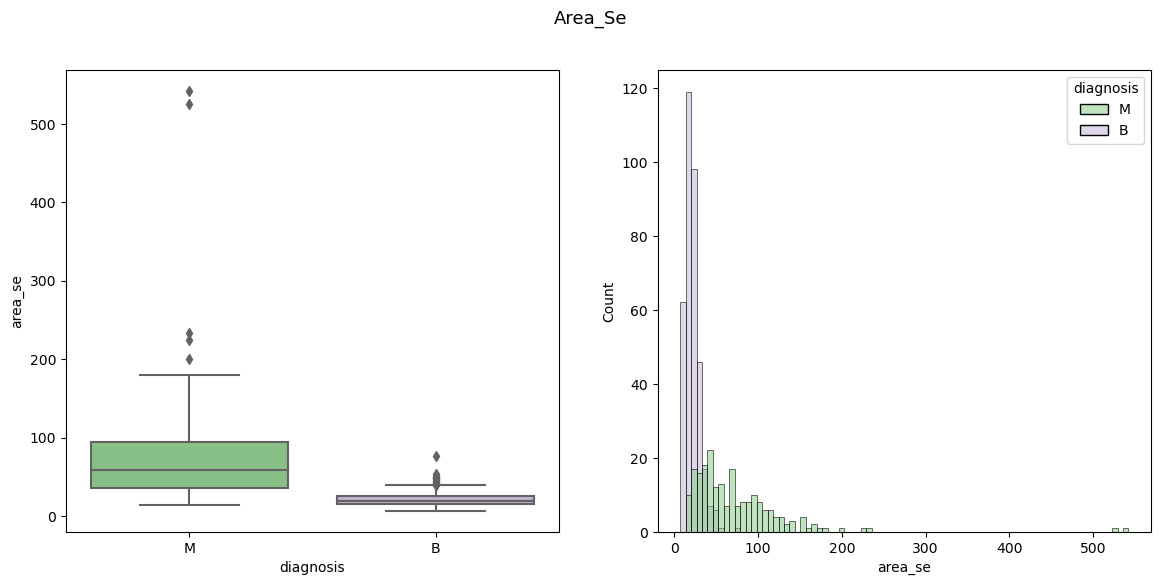

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
50%        0.006380
60%        0.006944
70%        0.007773
80%        0.008828
90%        0.010410
95%        0.012644
99%        0.017258
max        0.031130
Name: smoothness_se, dtype: float64


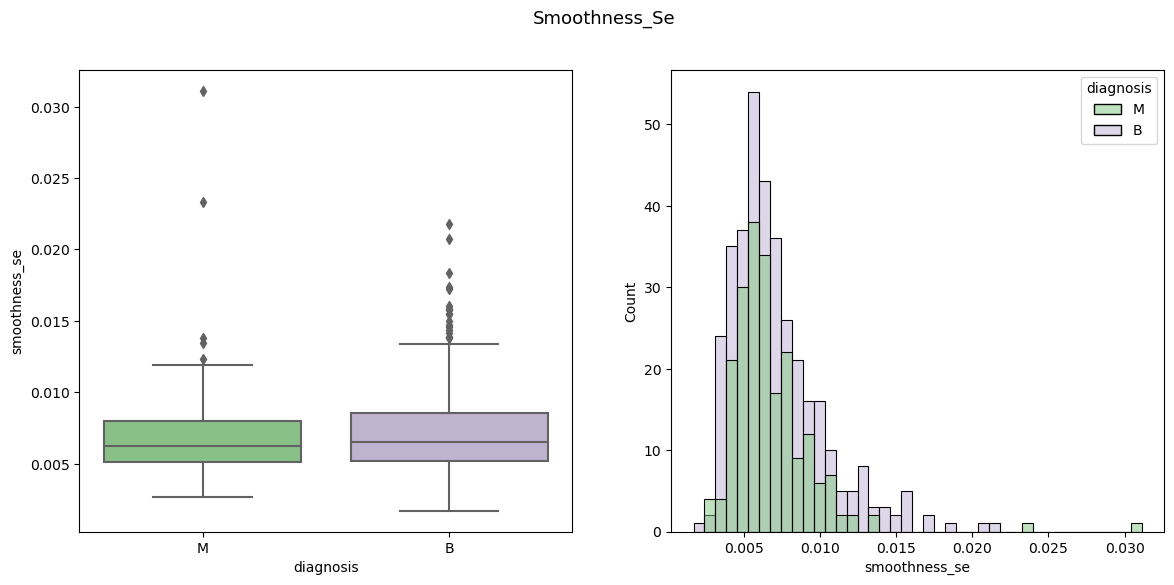

count    569.000000
mean       0.025478
std        0.017908
min        0.002252
50%        0.020450
60%        0.024480
70%        0.030136
80%        0.036198
90%        0.047602
95%        0.060578
99%        0.089872
max        0.135400
Name: compactness_se, dtype: float64


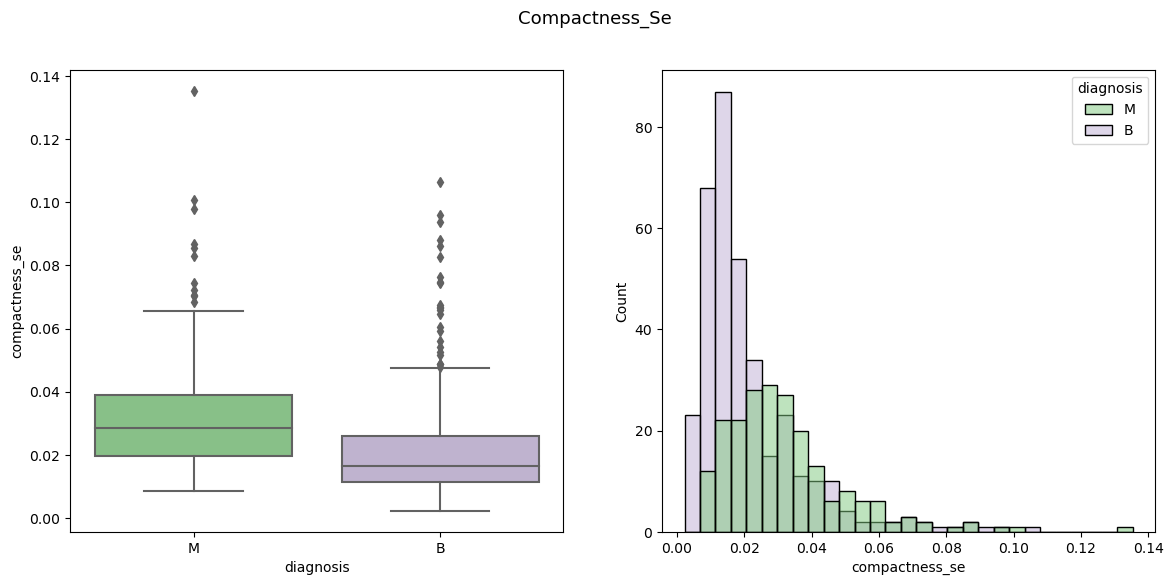

count    569.000000
mean       0.031894
std        0.030186
min        0.000000
50%        0.025890
60%        0.030544
70%        0.037362
80%        0.046404
90%        0.058520
95%        0.078936
99%        0.122292
max        0.396000
Name: concavity_se, dtype: float64


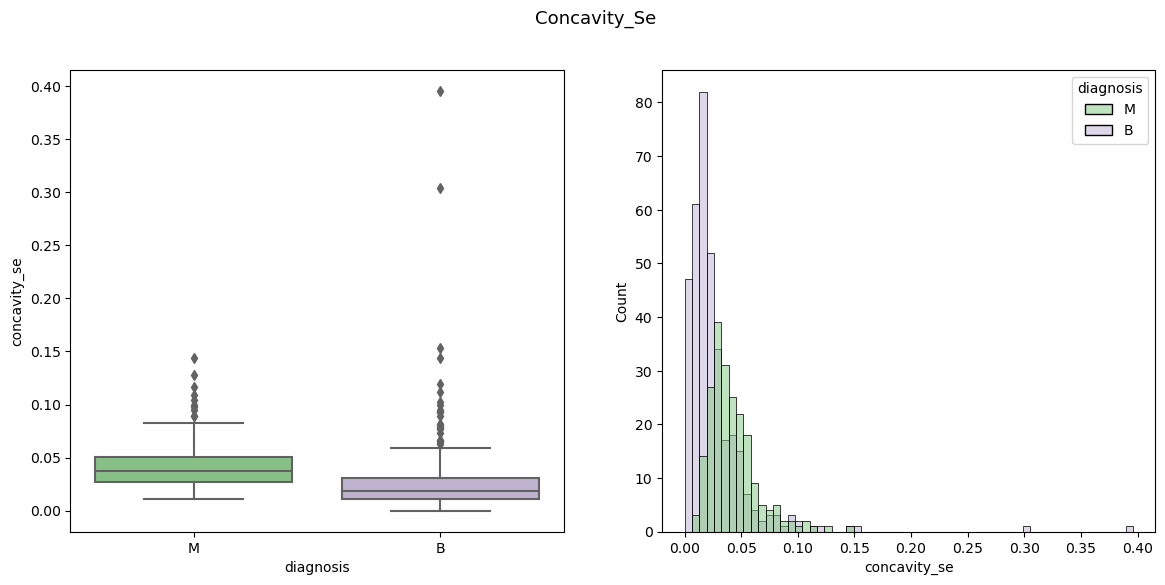

count    569.000000
mean       0.011796
std        0.006170
min        0.000000
50%        0.010930
60%        0.012410
70%        0.013700
80%        0.015812
90%        0.018688
95%        0.022884
99%        0.031194
max        0.052790
Name: concave points_se, dtype: float64


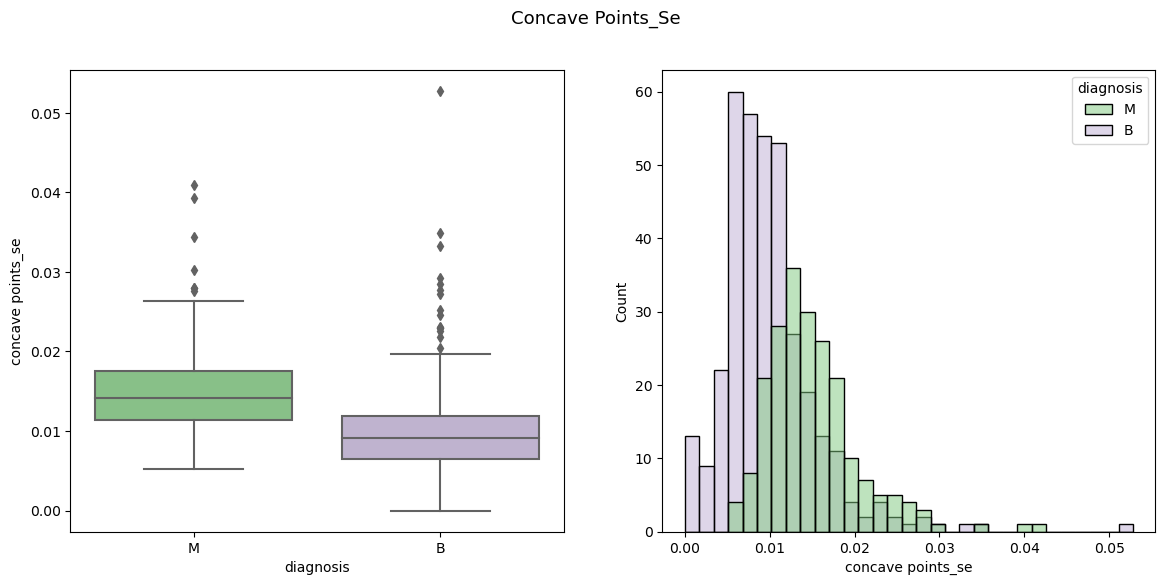

count    569.000000
mean       0.020542
std        0.008266
min        0.007882
50%        0.018730
60%        0.020066
70%        0.021978
80%        0.025680
90%        0.030120
95%        0.034988
99%        0.052208
max        0.078950
Name: symmetry_se, dtype: float64


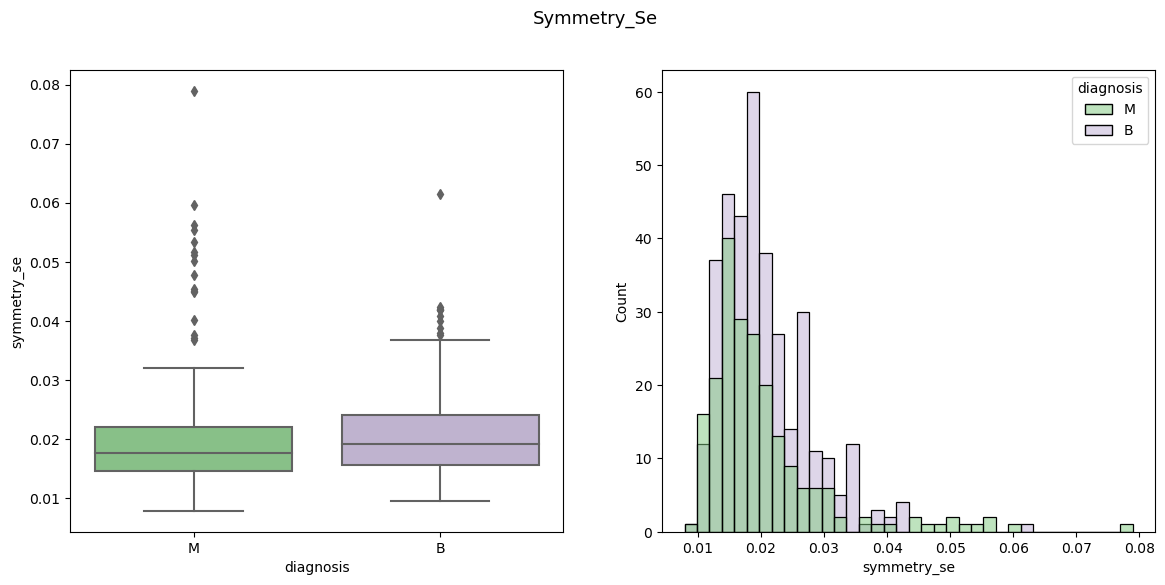

count    569.000000
mean       0.003795
std        0.002646
min        0.000895
50%        0.003187
60%        0.003611
70%        0.004172
80%        0.004830
90%        0.006185
95%        0.007960
99%        0.012650
max        0.029840
Name: fractal_dimension_se, dtype: float64


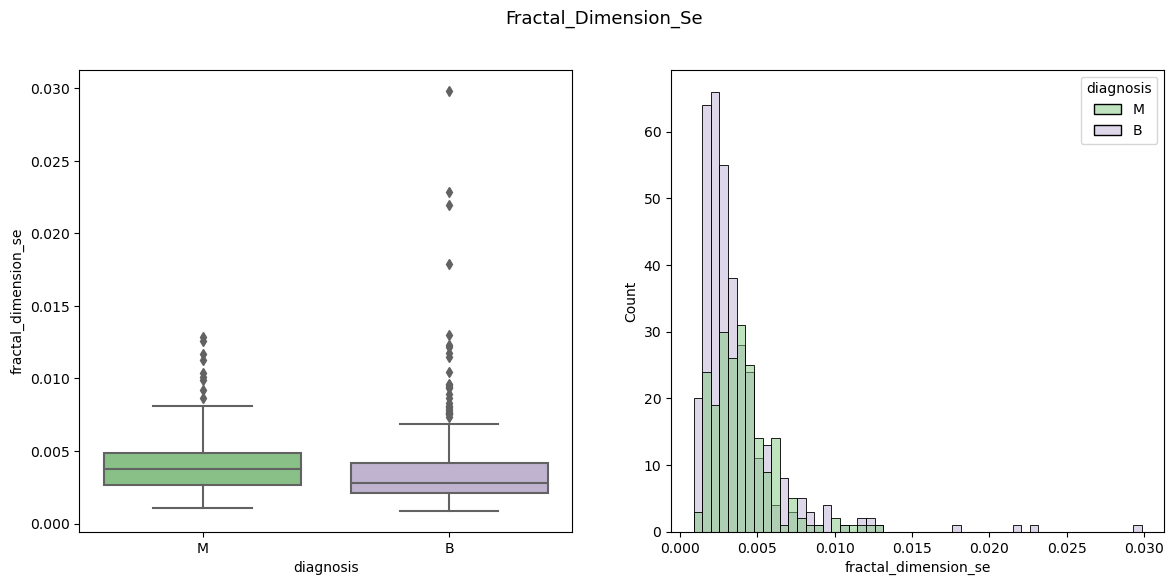

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
50%       14.970000
60%       16.004000
70%       17.386000
80%       20.294000
90%       23.682000
95%       25.640000
99%       30.762800
max       36.040000
Name: radius_worst, dtype: float64


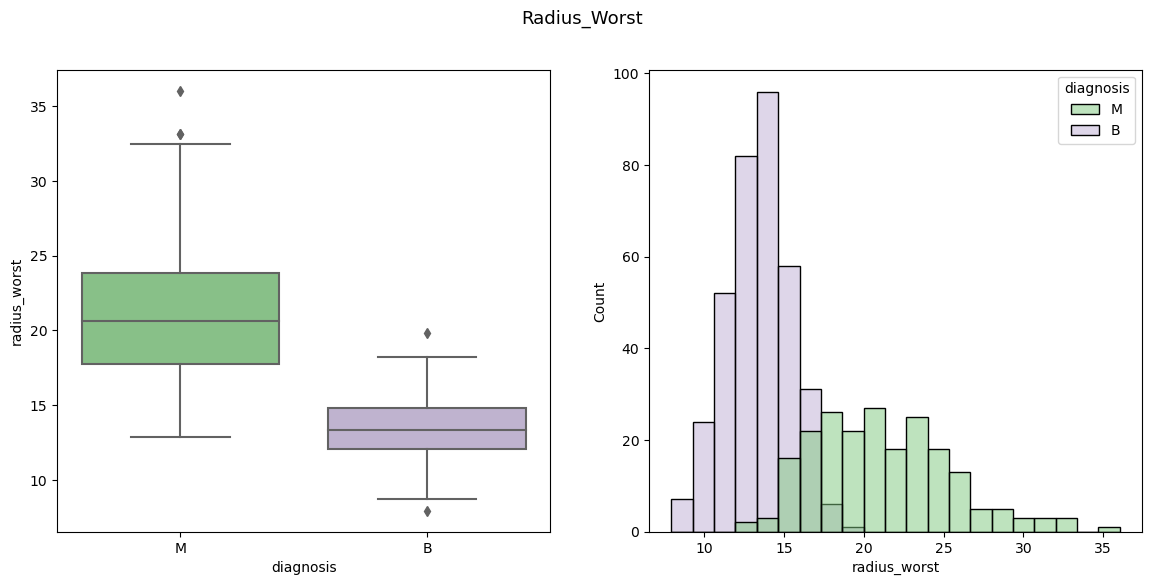

count    569.000000
mean      25.677223
std        6.146258
min       12.020000
50%       25.410000
60%       26.724000
70%       28.460000
80%       30.908000
90%       33.646000
95%       36.300000
99%       41.802400
max       49.540000
Name: texture_worst, dtype: float64


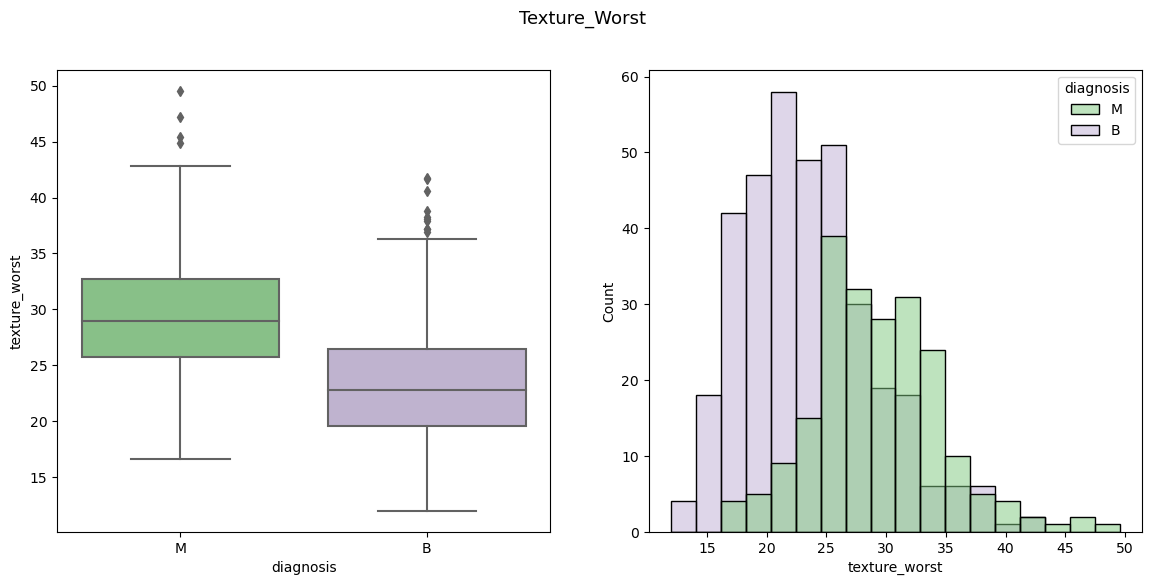

count    569.000000
mean     107.261213
std       33.602542
min       50.410000
50%       97.660000
60%      105.740000
70%      115.900000
80%      133.500000
90%      157.740000
95%      171.640000
99%      208.304000
max      251.200000
Name: perimeter_worst, dtype: float64


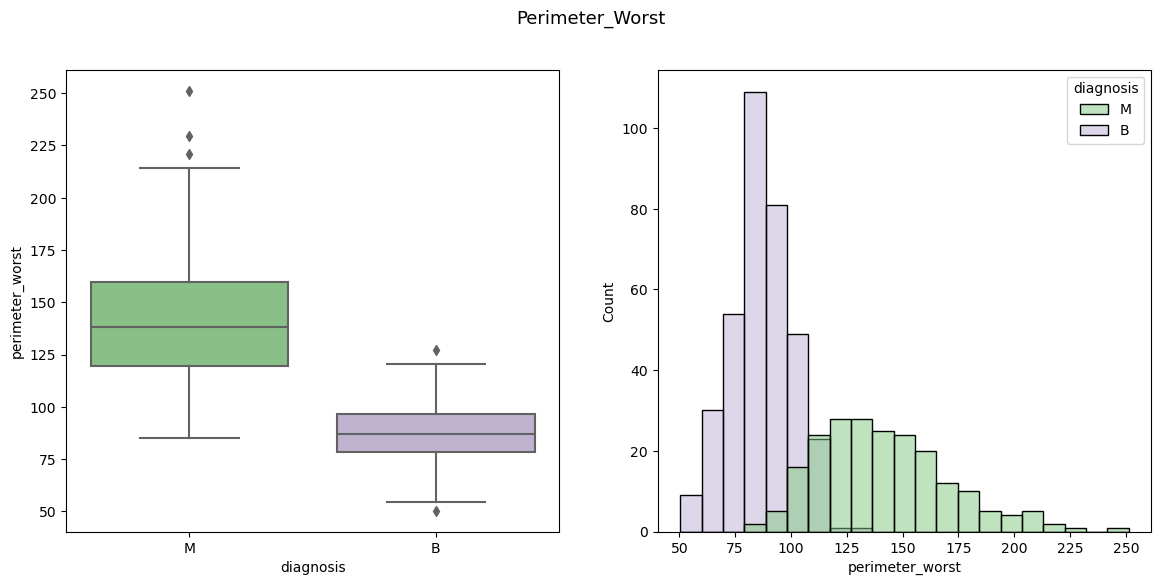

count     569.000000
mean      880.583128
std       569.356993
min       185.200000
50%       686.500000
60%       781.180000
70%       926.960000
80%      1269.000000
90%      1673.000000
95%      2009.600000
99%      2918.160000
max      4254.000000
Name: area_worst, dtype: float64


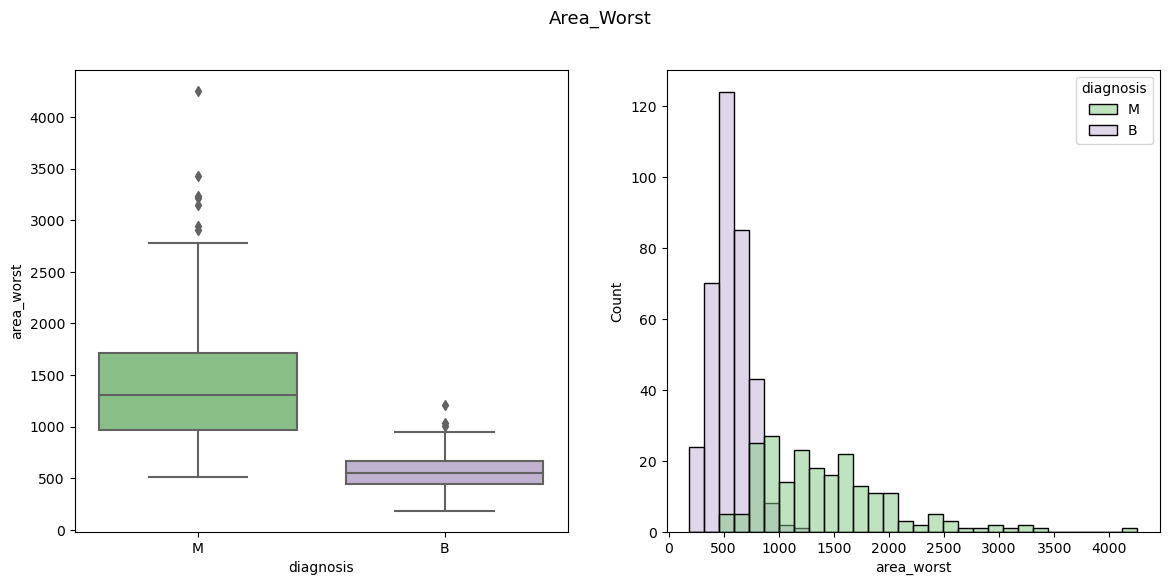

count    569.000000
mean       0.132369
std        0.022832
min        0.071170
50%        0.131300
60%        0.137680
70%        0.142600
80%        0.150080
90%        0.161480
95%        0.171840
99%        0.188908
max        0.222600
Name: smoothness_worst, dtype: float64


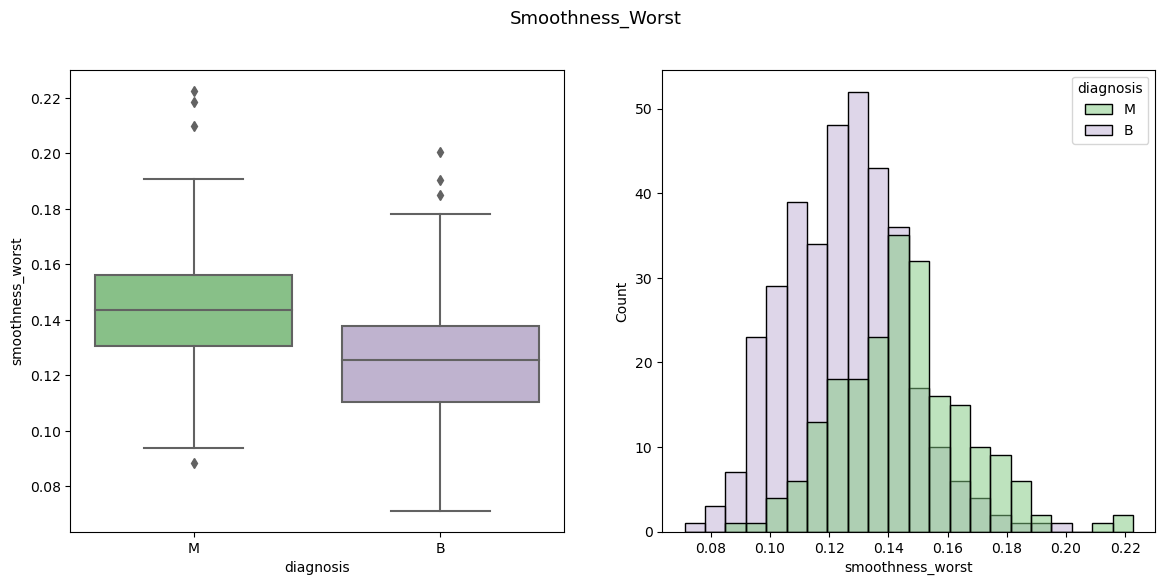

count    569.000000
mean       0.254265
std        0.157336
min        0.027290
50%        0.211900
60%        0.251400
70%        0.303960
80%        0.367060
90%        0.447840
95%        0.564120
99%        0.778644
max        1.058000
Name: compactness_worst, dtype: float64


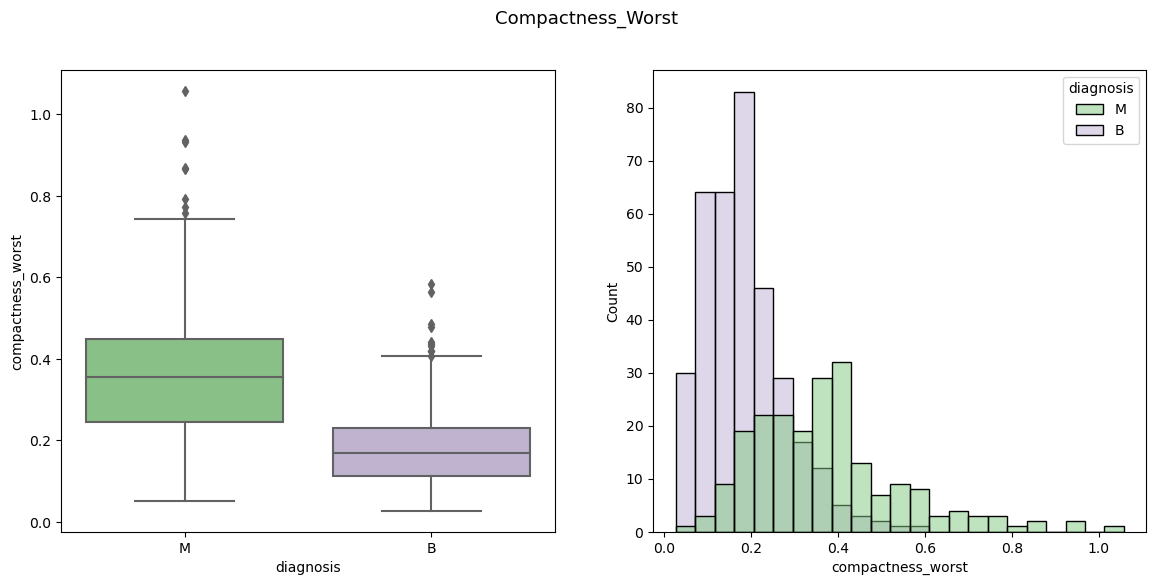

count    569.000000
mean       0.272188
std        0.208624
min        0.000000
50%        0.226700
60%        0.286600
70%        0.349920
80%        0.419540
90%        0.571320
95%        0.682380
99%        0.902380
max        1.252000
Name: concavity_worst, dtype: float64


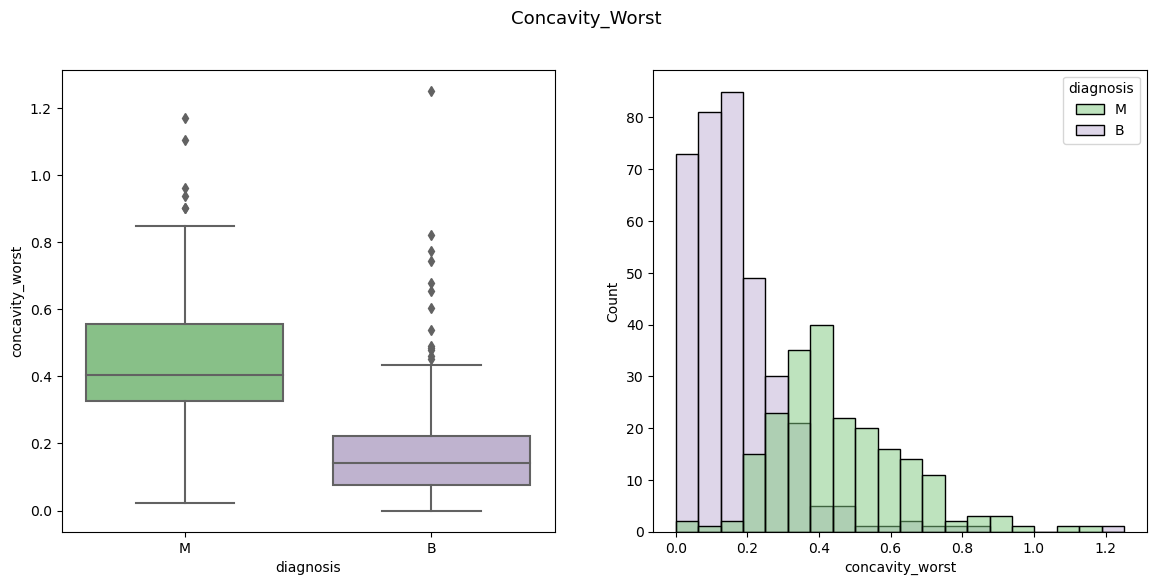

count    569.000000
mean       0.114606
std        0.065732
min        0.000000
50%        0.099930
60%        0.121800
70%        0.150800
80%        0.177540
90%        0.208940
95%        0.236920
99%        0.269216
max        0.291000
Name: concave points_worst, dtype: float64


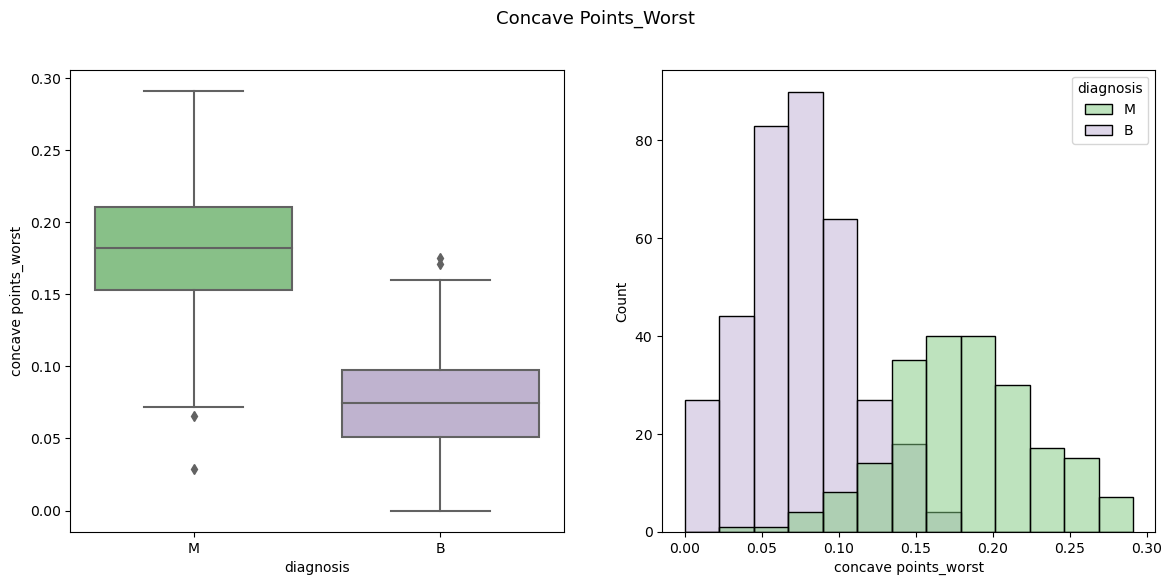

count    569.000000
mean       0.290076
std        0.061867
min        0.156500
50%        0.282200
60%        0.296480
70%        0.310220
80%        0.325380
90%        0.360080
95%        0.406160
99%        0.486908
max        0.663800
Name: symmetry_worst, dtype: float64


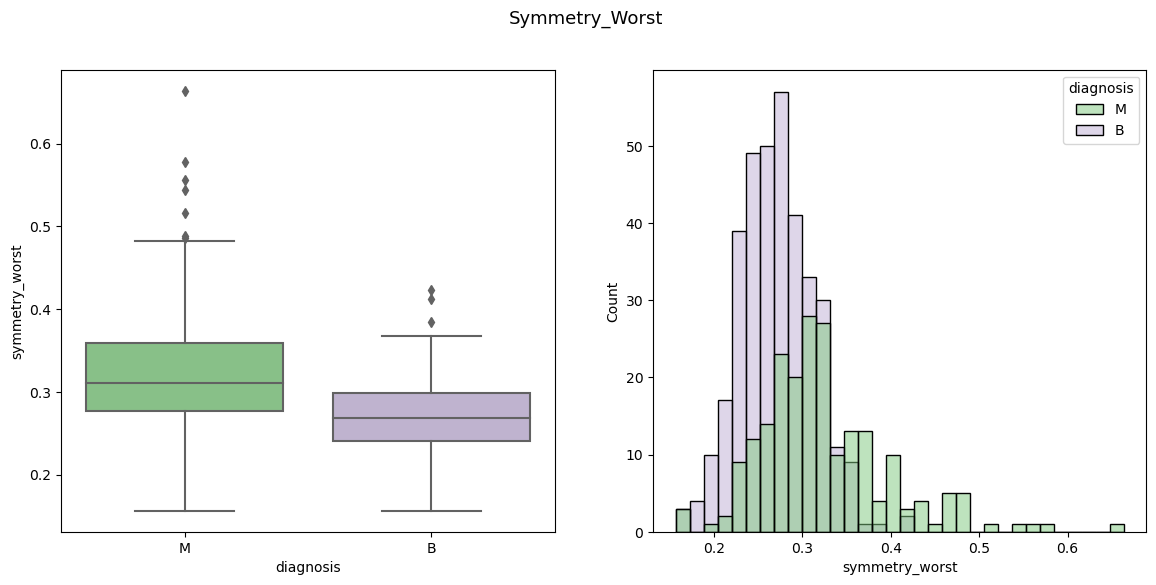

count    569.000000
mean       0.083946
std        0.018061
min        0.055040
50%        0.080040
60%        0.083202
70%        0.088984
80%        0.095934
90%        0.106320
95%        0.119520
99%        0.140628
max        0.207500
Name: fractal_dimension_worst, dtype: float64


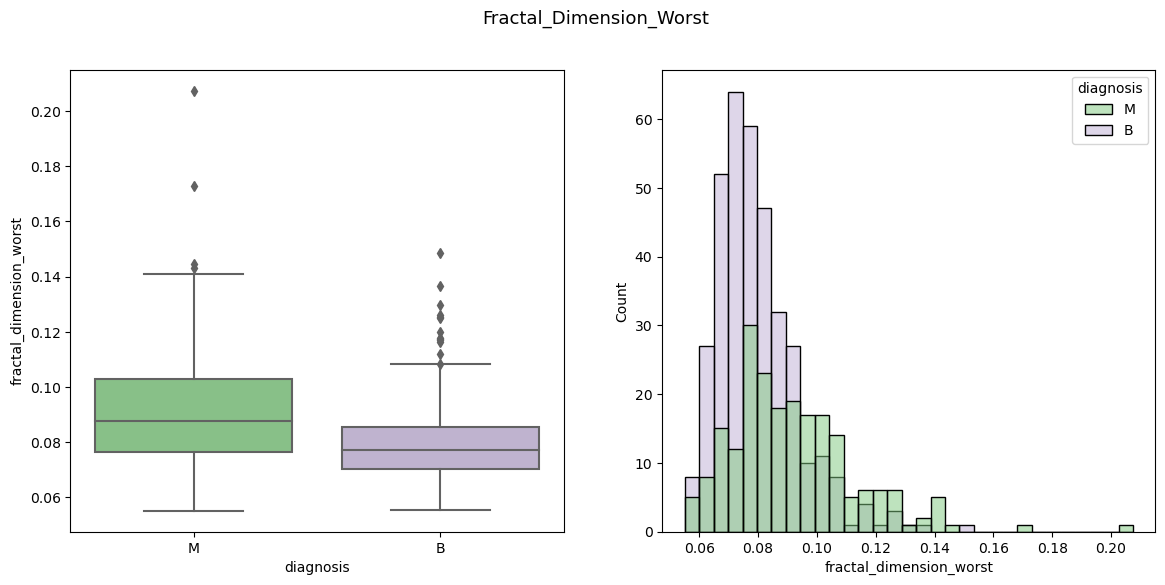

In [17]:
# Numerical Summary Function

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [ 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        fig, axes = plt.subplots(1, 2,figsize=(14,6))
        fig.suptitle(col.title(),size=13)
        sns.boxplot(ax=axes[0],y=col,x='diagnosis',data=dataframe,palette='Accent')
        sns.histplot(ax=axes[1],x=col,hue='diagnosis',data=dataframe,palette='Accent')
        plt.show()
        
for col in num_cols:
    num_summary(df,col,plot=True)


In [18]:
# Outlier Threshold Calculation Function

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [19]:
# Outlier Check Function

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [20]:
#def replace_with_thresholds(dataframe, col):
    #low, up = outlier_thresholds(dataframe,col)
    #dataframe.loc[dataframe[col] < low, col] = low
    #dataframe.loc[dataframe[col] > up, col] = up

#for col in num_cols:
  #replace_with_thresholds(df,col)

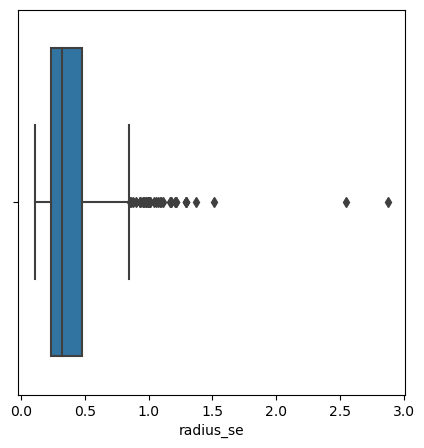

radius_se True


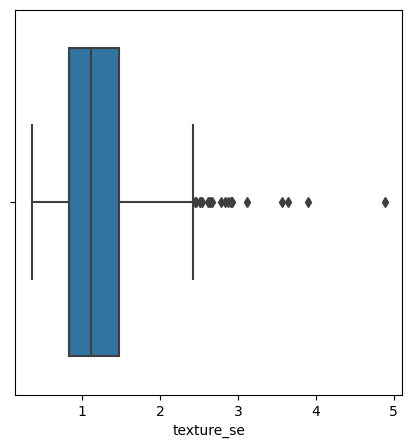

texture_se True


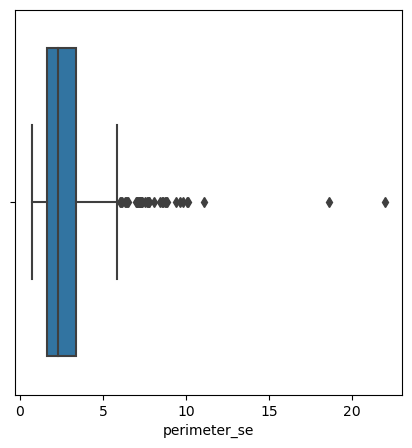

perimeter_se True


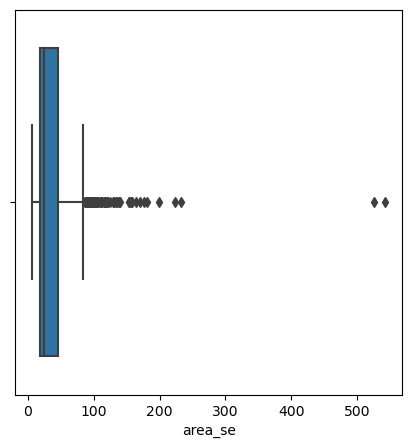

area_se True


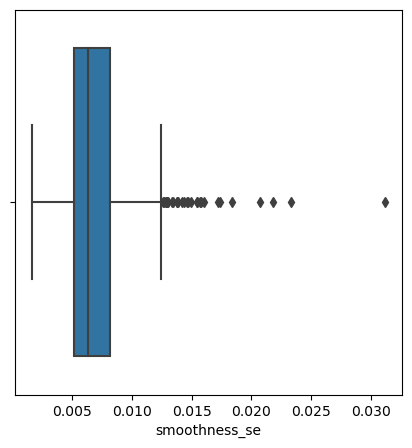

smoothness_se True


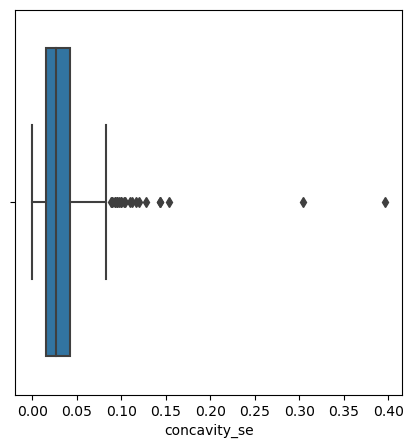

concavity_se True


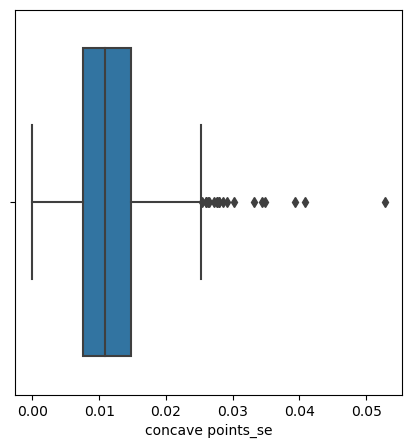

concave points_se True


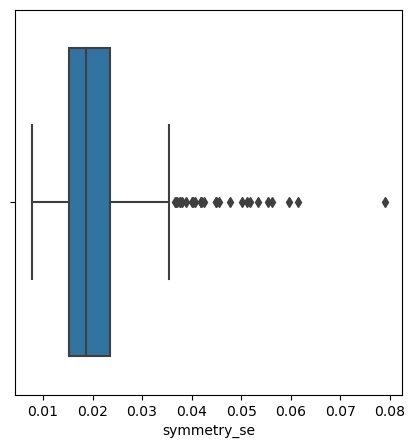

symmetry_se True


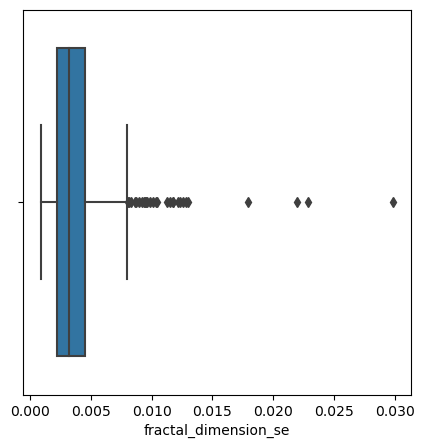

fractal_dimension_se True


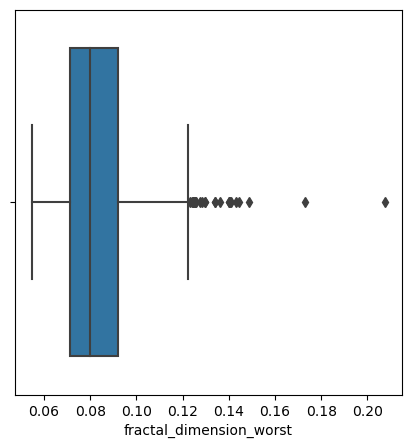

fractal_dimension_worst True


In [21]:
for col in num_cols:
    if check_outlier(df,col):
        plt.figure(figsize=(5, 5))
        sns.boxplot(x=df[col])
        plt.show(block=True)
        print(col,check_outlier(df,col))

In [22]:
# Analyzing Missing Values in a DataFrame

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end='\n')

    if na_name:
        if na_columns:
            return na_columns
        print ('No missing values in given data')

In [23]:
missing_values_table(df,na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []
No missing values in given data


In [24]:
#num_cols.append('diagnosis')
#plt.figure(figsize=(20,20))
#sns.pairplot(df[num_cols],hue='diagnosis',palette='Accent')
#plt.show()
#num_cols.remove('diagnosis')

Correlation Table:
                          radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_

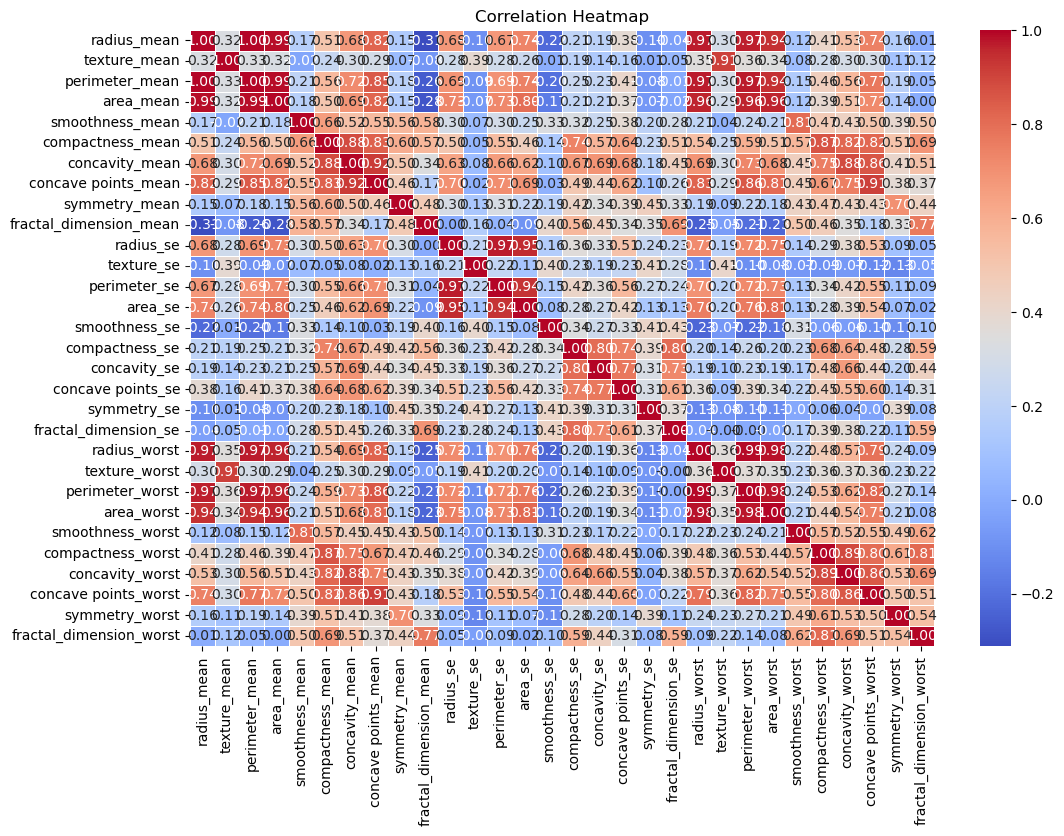

In [26]:
correlation_matrix = df[num_cols].corr()
print("Correlation Table:\n", correlation_matrix)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# B:benign
# M:malignant
diagnosis_map = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_map)

In [28]:
# Label Encoding Function

#def label_encoder(dataframe, binary_col):
    #labelencoder = LabelEncoder()
    #dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    #return dataframe

#binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

#for col in binary_cols:
    #df = label_encoder(df, col)

In [29]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


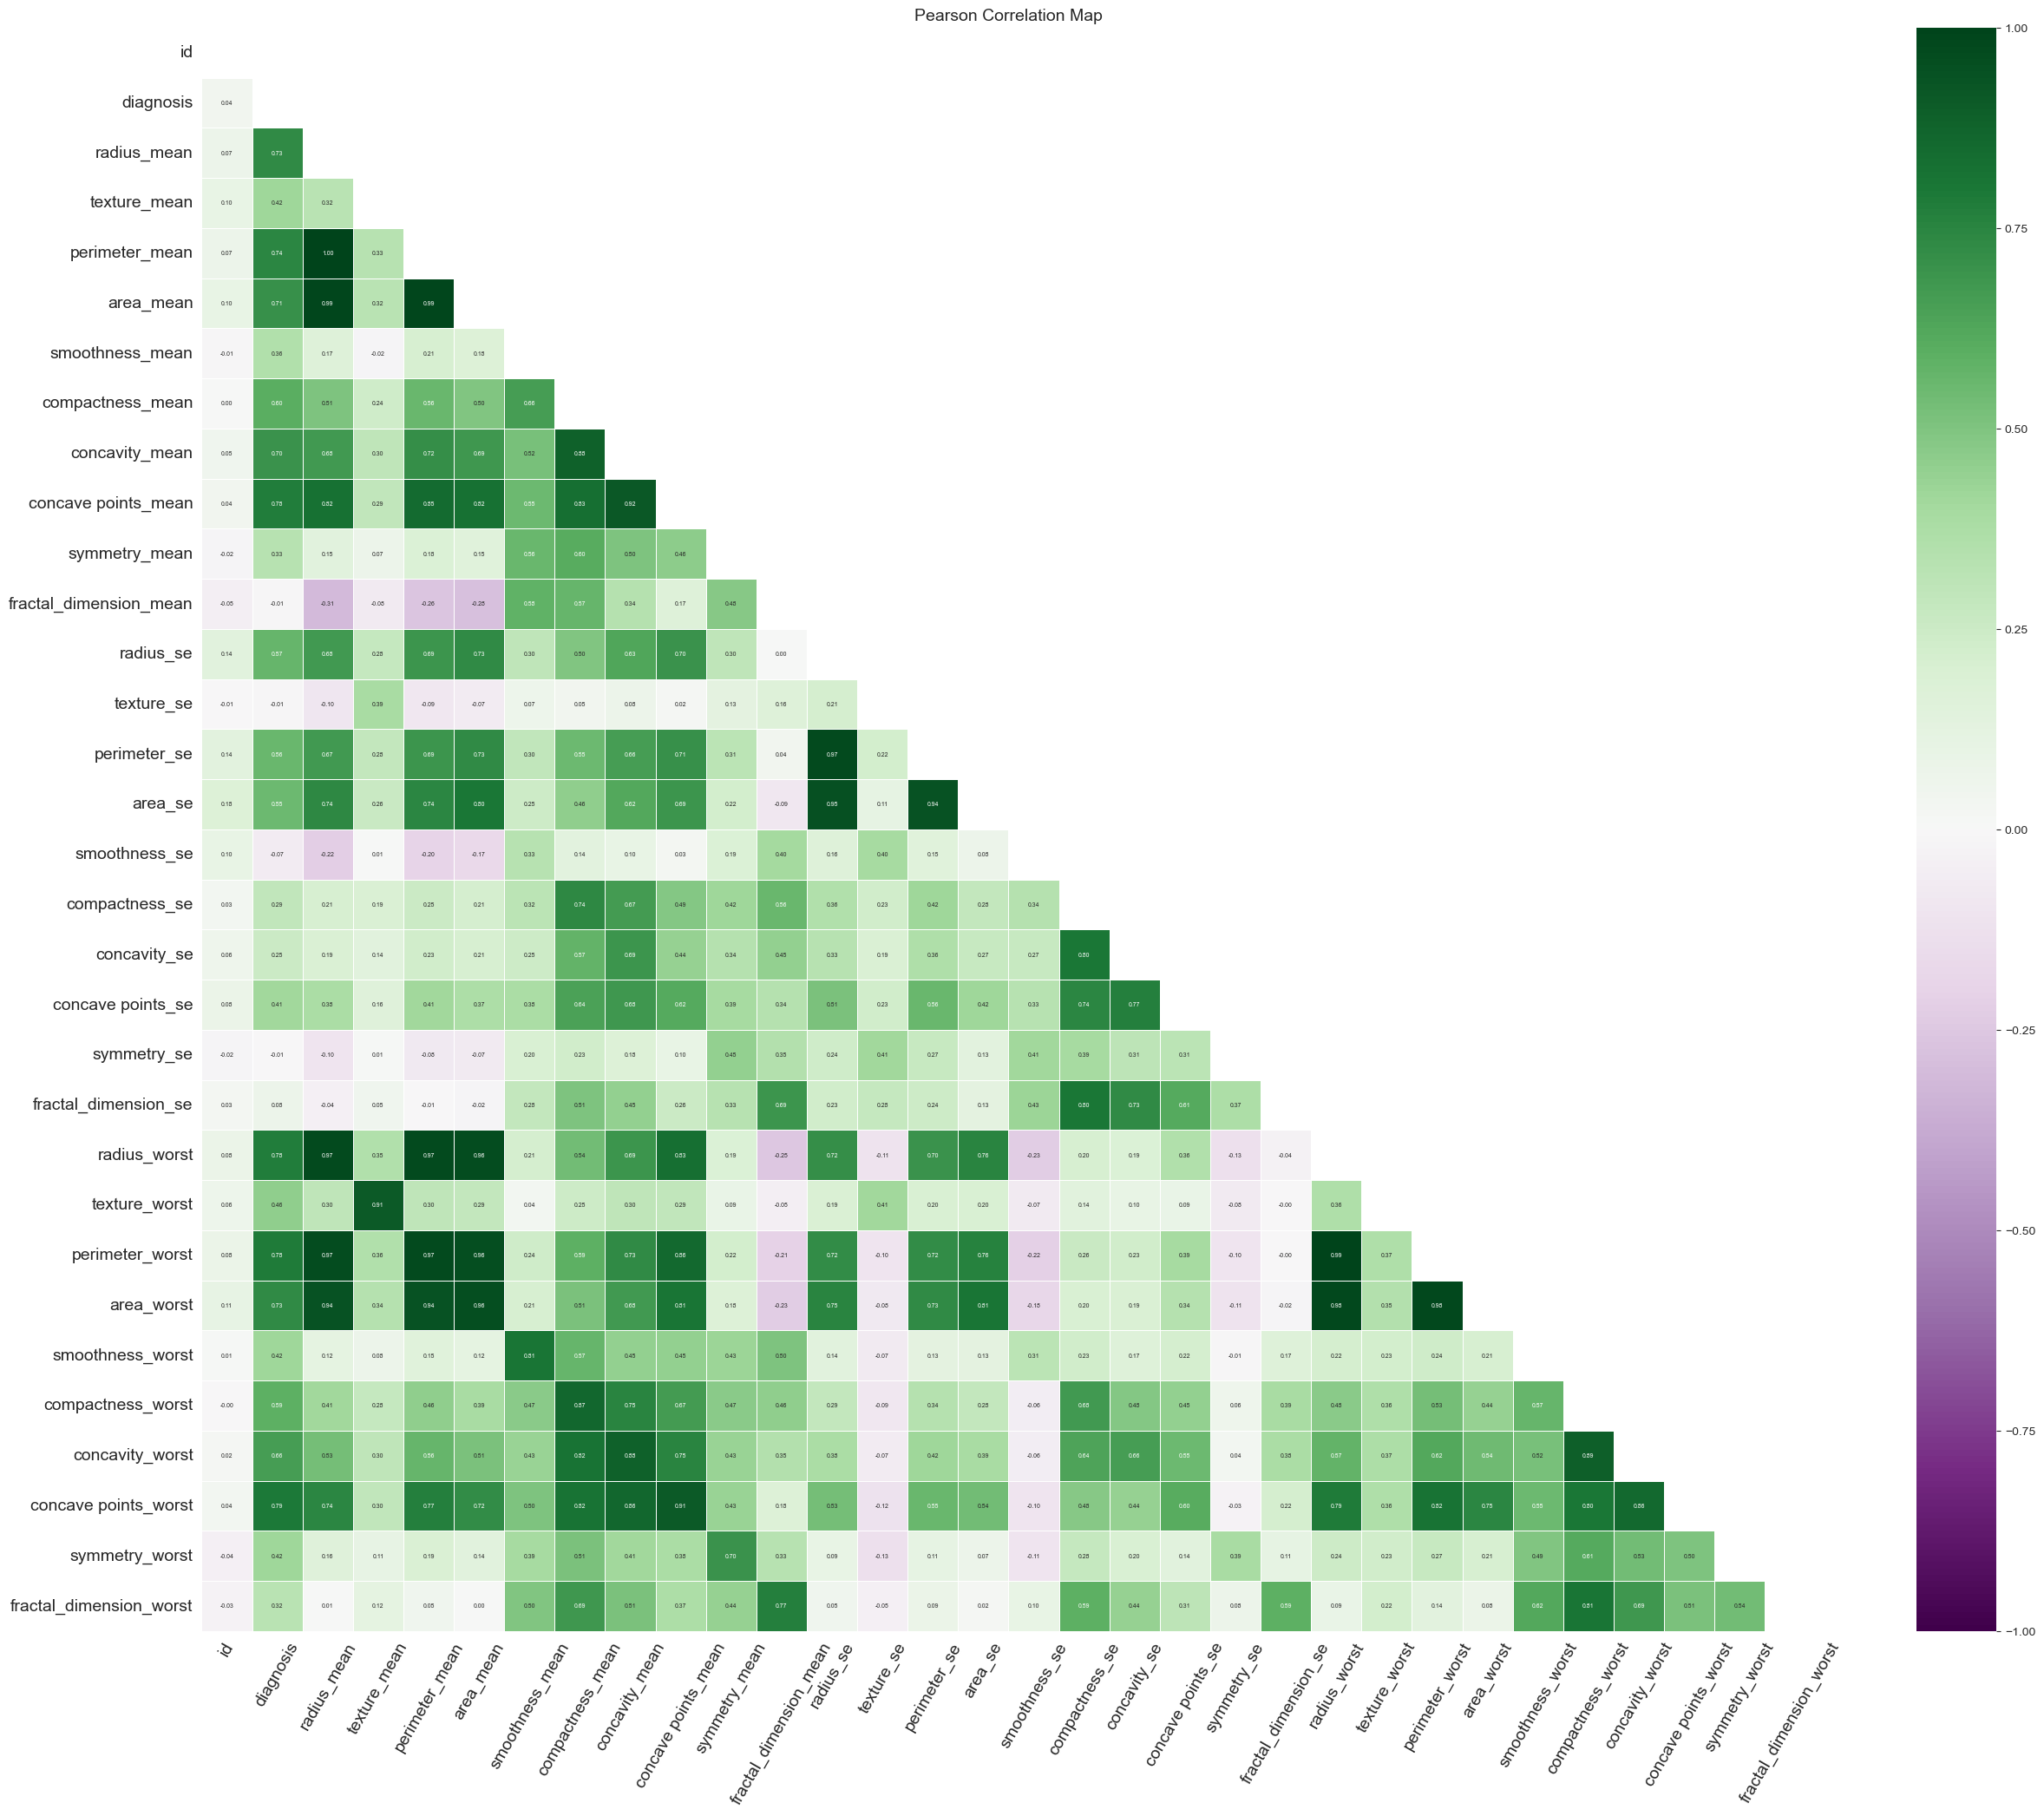

In [30]:
sns.set_style("white")
matrix = np.triu(df.corr(method="pearson"))
f,ax=plt.subplots(figsize = (30, 24))
sns.heatmap(df.corr(),annot= True,fmt = ".2f",ax=ax,
            vmin = -1, vmax = 1, mask = matrix, cmap = "PRGn",
            linewidth = 0.4,linecolor = "white",annot_kws={"size": 5})
plt.xticks(rotation=60,size=14)
plt.yticks(rotation=0,size=14)
plt.title('Pearson Correlation Map', size = 14)
plt.show()

In [31]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
scaler=StandardScaler()

In [34]:
df[num_cols]=scaler.fit_transform(df[num_cols])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [36]:
y=df["diagnosis"]
x=df.drop(["id","diagnosis"],axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [39]:
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred_lr = lr_model.predict(X_test)
score = accuracy_score(y_test,y_pred_lr)
print('Accuracy score: {}'.format(score))

Accuracy score: 0.9766081871345029
